In [1]:
import pandas as pd
import ixmp
import message_ix

from message_ix.utils import make_df

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
mp = ixmp.Platform()

In [3]:
scenario = message_ix.Scenario(mp, model='PTL model attempt', 
                               scenario='baseline', version='new')

In [4]:
horizon = range(2020,2051,5)
scenario.add_horizon(year=horizon)

In [5]:
country = 'Chinese'
scenario.add_spatial_sets({'country': country})

In [6]:
scenario.add_set("level", ["primary","secondary", "final", "useful"])

In [7]:
scenario.add_set("commodity", ["coal", "oil", "hydrogen","CO2","biomass","gasoline","diesel","liquid"])

In [8]:
scenario.add_set("mode", "standard")

In [9]:
scenario.add_par("interestrate", horizon, value=0.06, unit='-')

In [10]:
scenario.add_set("technology", ['oil_exc', 'oil_import', 'coal_exc', 'renewable_hydrogen','CO2_capture','biomass_exc','OTL','CTL','PTL','BTL','Transportation'])

In [11]:
year_df = scenario.vintage_and_active_years()
vintage_years, act_years = year_df['year_vtg'], year_df['year_act']

demand

In [12]:
gdp = pd.Series([1., 1.24812,1.4085 ,1.51879,1.55639,1.53383,1.43859], index=horizon)
beta = 1
demand = gdp ** beta

In [13]:
demand_ini_year = 399*0.66622*1000000 # 初始需求来源 Geer Teng 2017 全部转化为汽油

In [14]:
liquid_demand = pd.DataFrame({
        'node': country,
        'commodity': 'liquid',
        'level': 'useful',
        'year': horizon,
        'time': 'year',
        'value': demand_ini_year * demand,
        'unit': 't',
    })
scenario.add_par("demand", liquid_demand)

Scenario "PTL model attempt/baseline" has no solution
Some reporting may not function as expected
Failed 1 times to add:
    ((<tom:nl-t-yv-ya>, <function add at 0x000002475EBB3B80>, 'fom:nl-t-yv-ya', 'vom:nl-t-yv-ya'), {'strict': True, 'index': True})
    with MissingKeyError('fom:nl-t-yv-ya', 'vom:nl-t-yv-ya')
Failed 1 times to add:
    ((<tom:nl-t-yv-ya>, <function add at 0x000002475EBB3B80>, 'fom:nl-t-yv-ya', 'vom:nl-t-yv-ya'), {'strict': True, 'index': True})
    with MissingKeyError('fom:nl-t-yv-ya', 'vom:nl-t-yv-ya')


<AxesSubplot:title={'center':'Chinese Liquid Fuel Supply System Demand'}, xlabel='Year', ylabel='Mt'>

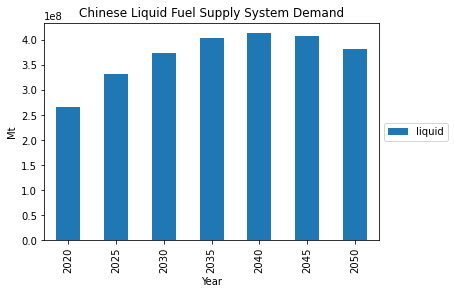

In [15]:
from message_ix.reporting import Reporter

rep = Reporter.from_scenario(scenario)

# Add keys like "plot activity" to describe reporting operations.
# See tutorial/utils/plotting.py
from message_ix.util.tutorial import prepare_plots

prepare_plots(rep)
rep.get("plot demand")

In [16]:
base = {
    'node_loc': country,
    'year_vtg': vintage_years,
    'year_act': act_years,
    'mode': 'standard',
    'time': 'year',
    'unit': '-',
}

base_input = make_df(base, node_origin=country, time_origin='year')
base_output = make_df(base, node_dest=country, time_dest='year')

In [17]:
oil_exc_out = make_df(base_output, technology='oil_exc', commodity='oil', 
                   level='primary', value=1.0)
scenario.add_par('output', oil_exc_out)

In [18]:
oil_import_out = make_df(base_output, technology='oil_import', commodity='oil', 
                   level='primary', value=1.0)
scenario.add_par('output', oil_import_out)

In [19]:
coal_exc_out = make_df(base_output, technology='coal_exc', commodity='coal', 
                   level='primary', value=1.0)
scenario.add_par('output', coal_exc_out)

In [20]:
biomass_exc_out = make_df(base_output, technology='biomass_exc', commodity='biomass', 
                   level='primary', value=1.0)  
scenario.add_par('output', biomass_exc_out)

In [21]:
# 可再生能源发电到电解水制氢 Christoph Falter 2020
renewable_hygrgen_out = make_df(base_output, technology='renewable_hydrogen', commodity='hydrogen', 
                   level='primary', value=0.00111)  
scenario.add_par('output',renewable_hygrgen_out )

In [22]:
CO2_capture_out = make_df(base_output, technology='CO2_capture', commodity='CO2', 
                   level='primary', value=1.0)  
scenario.add_par('output',CO2_capture_out )

In [23]:
# coal_exc_out

In [24]:
# OTL 技术输入输出数据  Zhou energy 2016
OTL_out = make_df(base_output, technology='OTL', commodity='gasoline', 
                   level='secondary', value=0.37)
scenario.add_par('output', OTL_out)

OTL_out1 = make_df(base_output, technology='OTL', commodity='diesel', 
                   level='secondary', value=0.63)
scenario.add_par('output', OTL_out1)

OTL_in = make_df(base_input, technology='OTL', commodity='oil',  
                  level='primary', value=1.1)
scenario.add_par('input', OTL_in)

In [25]:
# CTL 技术输入输出数据  Zhou energy 2016
CTL_out = make_df(base_output, technology='CTL', commodity='gasoline', 
                   level='secondary', value=0.25)
scenario.add_par('output', CTL_out)

CTL_out1 = make_df(base_output, technology='CTL', commodity='diesel', 
                   level='secondary', value=0.75)
scenario.add_par('output', CTL_out1)

CTL_in = make_df(base_input, technology='CTL', commodity='coal',  
                  level='primary', value=4.09)
scenario.add_par('input', CTL_in)

In [26]:
# BTL 技术输入输出数据  Ioanna Dimitrioua 2018
BTL_out = make_df(base_output, technology='BTL', commodity='gasoline', 
                   level='secondary', value=0.25)
scenario.add_par('output', CTL_out)

BTL_out1 = make_df(base_output, technology='BTL', commodity='diesel', 
                   level='secondary', value=0.6)
scenario.add_par('output', CTL_out1)

BTL_in = make_df(base_input, technology='BTL', commodity='biomass',  
                  level='primary', value=12.03)
scenario.add_par('input', BTL_in)

In [27]:
# PTL 技术输入输出数据  Christoph Falter 2020
PTL_out = make_df(base_output, technology='PTL', commodity='gasoline', 
                   level='secondary', value=0.84)
scenario.add_par('output', PTL_out)

PTL_out1 = make_df(base_output, technology='PTL', commodity='diesel', 
                   level='secondary', value=1.0)
scenario.add_par('output', PTL_out1)

PTL_in = make_df(base_input, technology='PTL', commodity='hydrogen',  
                  level='primary', value=0.000417)#单位 t
scenario.add_par('input', PTL_in)
PTL_in1 = make_df(base_input, technology='PTL', commodity='CO2',  
                  level='primary', value=4.8)
scenario.add_par('input', PTL_in1)

In [28]:
# transportation 技术输入输出数据
Transportation_out = make_df(base_output, technology='Transportation', commodity='liquid', 
                   level='useful', value=1)
scenario.add_par('output', Transportation_out)

Transportation_in = make_df(base_input, technology='Transportation', commodity='gasoline',  
                  level='secondary', value=1)#单位 t
scenario.add_par('input', Transportation_in)
TransportationL_in1 = make_df(base_input, technology='Transportation', commodity='diesel',  
                  level='secondary', value=1.05)#按照汽柴油比例1：1.05换算
scenario.add_par('input', TransportationL_in1)

operational constraints and parameters

In [29]:

base_capacity_factor = {
    'node_loc': country,
    'year_vtg': vintage_years,
    'year_act': act_years,
    'time': 'year',
    'unit': '-',
}
capacity_factor = {
    'oil_exc': 1, 
    'oil_import': 1,
    'coal_exc': 1, 
    'renewable_hydrogen': 0.5,
    'CO2_capture': 1,
    'biomass_exc': 1,
    'OTL': 1,
    'CTL': 1,
    'PTL': 1,
    'BTL': 1,
    'Transportation': 1
 }

for tec, val in capacity_factor.items():
    df = make_df(base_capacity_factor, technology=tec, value=val)
    scenario.add_par('capacity_factor', df)

In [30]:
base_technical_lifetime = {
    'node_loc': country,
    'year_vtg': horizon,
    'unit': 'y',
}

In [31]:
lifetimes = {
    'oil_exc': 20, 
    'oil_import': 20,
    'coal_exc': 20, 
    'renewable_hydrogen': 20,
    'CO2_capture': 20,
    'biomass_exc': 20,
    'OTL': 20,
    'CTL': 20,
    'PTL': 20,
    'BTL': 20,
    'Transportation': 20
    
}

for tec, val in lifetimes.items():
    df = make_df(base_technical_lifetime, technology=tec, value=val)
    scenario.add_par('technical_lifetime', df)

growth rate constraint 50% （这一段暂时不能运行）

In [32]:
base_growth = {
    'node_loc': country,
    'year_act': horizon[1:],
    'value':20,
    'time': 'year',
    'unit': '%',
}

In [33]:
growth_technologies = [
    'oil_exc', 
    'oil_import',
    'coal_exc', 
    'renewable_hydrogen',
    'CO2_capture',
    'biomass_exc',
    'OTL',
    'CTL',
    'PTL',
    'BTL',
    'Transportation', 
]

for tec in growth_technologies:
    df = make_df(base_growth, technology=tec) 
    scenario.add_par('growth_activity_up', df)

In [34]:
scenario.par('growth_activity_up')

,node_loc,technology,year_act,time,value,unit
0,Chinese,oil_exc,2025,year,20.0,%
1,Chinese,oil_exc,2030,year,20.0,%
2,Chinese,oil_exc,2035,year,20.0,%
3,Chinese,oil_exc,2040,year,20.0,%
4,Chinese,oil_exc,2045,year,20.0,%
...,...,...,...,...,...,...
61,Chinese,Transportation,2030,year,20.0,%
62,Chinese,Transportation,2035,year,20.0,%
63,Chinese,Transportation,2040,year,20.0,%
64,Chinese,Transportation,2045,year,20.0,%


base initial (这玩意是啥还不知道）

base activity

In [35]:
base_activity = {
    'node_loc': country,
    'year_act': [2020],
    'mode': 'standard',
    'time': 'year',
    'unit': 't',
}

In [36]:
activity = {
    'CTL': 26350000,
    'BTL': 1000000,
    'PTL': 0,
    'OTL':246641964
    
}
for tec, val in activity.items():
    df = make_df(base_activity, technology=tec, value=val)
    #scenario.add_par('bound_activity_up', df)
    scenario.add_par('bound_activity_lo', df)

base capacity

In [37]:
base_capacity = {
    'node_loc': country,
    'year_vtg': [2020],
    'unit': 't',
}

cf = pd.Series(capacity_factor)
act = pd.Series(activity)
capacity = (act / cf).dropna().to_dict()

for tec, val in capacity.items():
    df = make_df(base_capacity, technology=tec, value=val)
    scenario.add_par('bound_new_capacity_up', df)

Investment Costs

In [38]:
base_inv_cost = {
    'node_loc': country,
    'year_vtg': horizon,
    'unit': 'RMB/t',
}

In [39]:
# Adding a new unit to the library
mp.add_unit('RMB/t')  

In [40]:
costs = {
    'oil_exc': 0, 
    'oil_import': 0,
    'coal_exc': 0, 
    'renewable_hydrogen': 3430,# 找文献，待定 doi.org/10.1039/C8EE00111A (PEM) CNY/t 汇率6.5
    'CO2_capture': 515,# CNY/T/y 来源 Christoph Falter 2020 汇率7.5 30年寿命 年产5万吨
    'biomass_exc': 0,
    'OTL': 2578,#文献 Huairong Zhou 2016
    'CTL': 15495, #文献：自己文章, 太高的话尝试 12000 来源 Zhou energy 2016,原始数值 15495
    'PTL': 6895,# 来源 Christoph Falter 2020  30年寿命 年产五万吨 单位 CNY/t/y
    'BTL': 1526,# 来源 Ioanna Dimitrioua 2018 年产能 0.136million 吨  单位 CNY/t/y
    'Transportation': 0
}

for tec, val in costs.items():
    df = make_df(base_inv_cost, technology=tec, value=val)
    scenario.add_par('inv_cost', df)

Fixed O&M Costs

In [41]:
base_fix_cost = {
    'node_loc': country,
    'year_vtg': vintage_years,
    'year_act': act_years,
    'unit': 'CNY/t',
}

In [42]:
# Adding a new unit to the library
mp.add_unit('CNY/t')  

In [43]:
#全部按 investment cost 的 5% 计算
costs = {
    'oil_exc': 0, 
    'oil_import': 0,
    'coal_exc': 0, 
    'renewable_hydrogen': 171.5,
    'CO2_capture': 25.75,
    'biomass_exc': 0,
    'OTL': 128.9,
    'CTL': 774.75, #原始数据774.75
    'PTL': 334.75,
    'BTL': 76.3,
    'Transportation': 0
}

for tec, val in costs.items():
    df = make_df(base_fix_cost, technology=tec, value=val)
    scenario.add_par('fix_cost', df)

O&M Costs

In [44]:
base_var_cost = {
    'node_loc': country,
    'year_vtg': vintage_years,
    'year_act': act_years,
    'mode': 'standard',
    'time': 'year',
    'unit': 'CNY/t',
}

In [45]:
costs = {
    'oil_exc': 3000, 
    'oil_import': 2382,#1吨=7.33捅 按50美元计算，汇率6.5
    'coal_exc': 10,#前三个都是暂时假设 
    'renewable_hydrogen': 16685,#氢能报告，氢价按1.5 CNY/m^3 计算
    'CO2_capture': 90,#来源 W.L.Becker 2012
    'biomass_exc': 416.55,# 来源 Ioanna Dimitrioua 2018
    'OTL': 2701,
    'CTL': 3980, #袁术数据 3890
    'PTL': 7878,
    'BTL': 8491,#以上四个来源AMPL程序
    'Transportation': 0
}

for tec, val in costs.items():
    df = make_df(base_var_cost, technology=tec, value=val)
    scenario.add_par('var_cost', df)

In [46]:
scenario.add_set('emission', 'CO2')
scenario.add_cat('emission', 'GHGs', 'CO2')

In [47]:
base_emissions = {
    'node_loc': country,
    'year_vtg': vintage_years,
    'year_act': act_years,
    'mode': 'standard',
    'unit': 'tCO2/kWa',
}
mp.add_unit('tCO2/t')
mp.add_unit('MtCO2')

emissions = {
   'OTL': ('CO2', 0.33), # units: tCO2/t 来源 孟宪玲，当代石油化工 1t原油对应 0.3 tCO2
    'CTL':  ('CO2', 4.75), # units: tCO2/t 来源 Meiyu Guo 2018
    'PTL':  ('CO2', 0.05),# units: tCO2/t 来源 Matthew Jouny 2018 Fig8 按比例折算
    'BTL':  ('CO2', 0.18)# units: tCO2/t
}


for tec, (species, val) in emissions.items():
    df = make_df(base_emissions, technology=tec, emission=species, value=val)
    scenario.add_par('emission_factor', df)

In [48]:
comment = 'initial attempt'
scenario.commit(comment)
scenario.set_as_default()

In [49]:
scenario.solve()

In [50]:
scenario.var('OBJ')['lvl']

102222125858816.0

In [51]:
from message_ix.reporting import Reporter

rep = Reporter.from_scenario(scenario)

# Add keys like "plot activity" to describe reporting operations.
# See tutorial/utils/plotting.py
from message_ix.util.tutorial import prepare_plots

prepare_plots(rep)

<AxesSubplot:title={'center':'Chinese Liquid Fuel Supply System Activity'}, xlabel='Year', ylabel='Mt'>

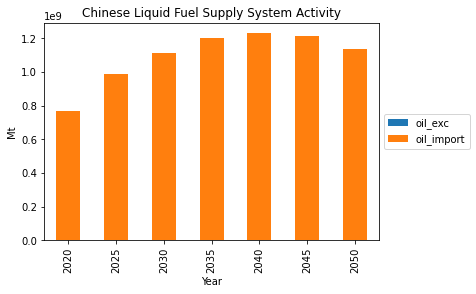

In [52]:
# Only show a subset of technologies in the follow plots;
# e.g. exclude "bulb" and "grid"
rep.set_filters(t=["oil_exc", "oil_import"])

# Trigger the calculation and plotting
rep.get("plot activity")

<AxesSubplot:title={'center':'Chinese Liquid Fuel Supply System Activity'}, xlabel='Year', ylabel='Mt'>

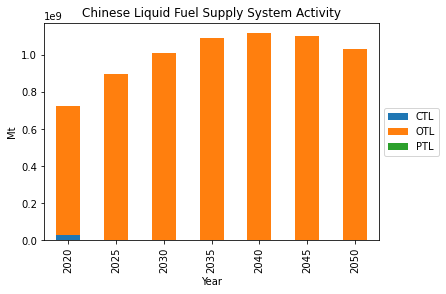

In [53]:
# Only show a subset of technologies in the follow plots;
# e.g. exclude "bulb" and "grid"
rep.set_filters(t=["OTL", "CTL","PTL","BTL"])

# Trigger the calculation and plotting
rep.get("plot activity")

<AxesSubplot:title={'center':'Chinese Liquid Fuel Supply System Capacity'}, xlabel='Year', ylabel='Mt'>

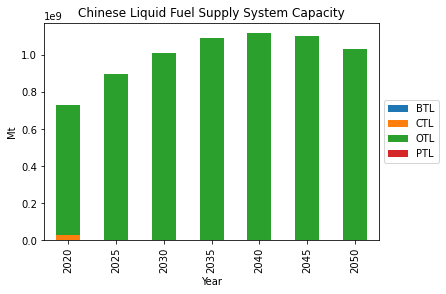

In [54]:
rep.get("plot capacity")

In [55]:
scenario.var('ACT')['lvl']

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
           ...     
237    0.000000e+00
238    0.000000e+00
239    4.077254e+08
240    0.000000e+00
241    0.000000e+00
Name: lvl, Length: 242, dtype: float64

In [56]:
scenario.var('ACT').to_csv('1.csv')

In [57]:
 mp.close_db()